importing libraries and dataset

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('comp_train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


checking if the dataset has null values.
Using mean() function in order to get how much portion of the total dataset is missing in each column.

In [79]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

dropping the column 'Cabin' since it has more than 50% of the dataset missing. 
The column 'Embarked' and 'Age' has missing values less than 50%. The missing values of the column 'Embarked' will be filled by the most occuring element in the column, while the rows in which the values of the 'Age' column is missing will be removed.

In [80]:
df.drop(columns=['Cabin'],inplace=True)


In [81]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

'S' is the most repeated value in the Column 'Embarked'. So filling the missing values by 'S'.

In [82]:
df["Embarked"]=df['Embarked'].fillna("S")
df.shape

(891, 11)

removing the rows which have missing values in 'Age' column

In [83]:
df=df[~df['Age'].isna()]
df.shape

(714, 11)

Renaming the column 'Embarked' as 'Embark'

In [84]:
df=df.rename(columns={'Embarked':'Embark'})

transforming values of C,Q,S

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embark']=le.fit_transform(df['Embark'])

In [89]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embark
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0


Visiualizing the relation of 'Sex' and 'Pclass' with the Column 'Survived' using bar graph

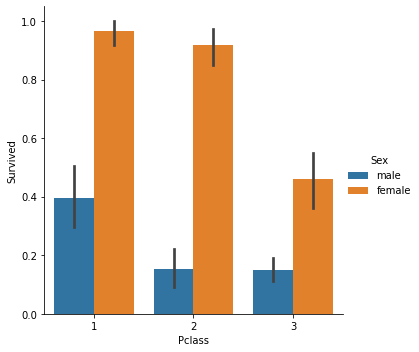

In [86]:
sns.catplot(x='Pclass',y='Survived',kind='bar',data=df,hue='Sex')


We can observe that people in Pclass:1 have higher chance of survival while the people from Pclass:3 have very low chances of survival. The fares of Pclass:1 were very high, so the people who were rich and considered elite must be travelling in this class. Hence, there survival would have been given more importance as commpared to people in the Pclass 1 and 2. This explains why the more people from Pclass:1 were able to survive. 

Number of females who survived is much more then the number of males who survived irrespecive of the Pclass.

This concludes that, survival highly depends on the gender. In each class, the surviving probability of a female is much more than the probability of a male surviving. Survival also depends on Pclass, as lower the Pclass higher are the chances of survival

In [88]:
df.to_csv('Comp_train_preprocess.csv', index=False)